In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
#%whos
#%reset -f

##### Fig 1.1

In [3]:
#up2024_0120 14:37

loc_0 = 'E:/zyf_gn/zyf_gn_2301_data/ppa_2301_k2/shp/6/res3/' #to_be_set
loc_1 = 'E:/zyf_gn/zyf_gn_2301_data/ppa_2301_k2/shp/6/FIG/' #to_be_set
var_names = pd.read_csv(loc_0 +'var_names.csv')
print('var_names:\n', var_names)

var_names:
             var var_name
0       terrain      ELE
1         slope      SLP
2   XB1b_mean_1      FAR
3    XL_lsi_gre    LSI_V
4     XL_ai_imp     AI_I
5     XL_ai_gre     AI_V
6          ndvi     NDVI
7    XL_lsi_imp    LSI_I
8     XA_RIVERW       RW
9   XB1b_mean_2      MBH
10    XL_ps_imp  PLAND_I
11    XL_ps_gre  PLAND_V
12   XB1b_ratio      BCR
13        XL_pd       PD


In [4]:
#up2024_0120 14:39
#change the variable names

def var_names2(f_1):
    f_order = var_names['var'].tolist().index(f_1)
    f_name = var_names['var_name'][f_order]
    return(f_name)

In [248]:
#up2024_0120 14:45
#get the data of the input file

order_0 = ['5','4']  #to_be_set
buffer_0 = ['d01s5','d01s4']  #to_be_set
vari_y_0 = ['XY_rci', 'XY_crci'] #to_be_set
title_0 = ['Normal summer day', 'Extremely hot day'] #to_be_set
subtitle_0 = ['(a)', '(b)'] #to_be_set

name_0 = list()
name_1 = list()
data_0 = dict()
data_1 = dict()
value_0 = dict()
value_1 = dict()
vari_0 = dict()
vari_1 = dict()

for ii in range(len(order_0)):
    name_0.append('2301_brt_impor_1_' + order_0[ii] + '_buf' + buffer_0[ii] + vari_y_0[0])
    name_1.append('2301_brt_impor_1_' + order_0[ii] + '_buf' + buffer_0[ii] + vari_y_0[1])
    
for ii in range(len(order_0)):
    data_0[ii] = pd.read_csv(loc_0 + name_0[ii] + '.csv')
    data_1[ii] = pd.read_csv(loc_0 + name_1[ii] + '.csv')
    value_0[ii] = data_0[ii]['rel.inf']
    value_1[ii] = data_1[ii]['rel.inf']
    vari_0[ii] = data_0[ii]['var']
    vari_1[ii] = data_1[ii]['var']
    
print('name_0:\n', name_0)
print('name_1:\n', name_1)
#print('data_0_0:\n', data_0[0])
#print('data_0_1:\n', data_0[1])
#print('data_1_0:\n', data_1[0])
#print('data_1_1:\n', data_1[1])

print('================')
data_len = data_0[0].shape[0]
print('data_len:\n', data_len)

name_0:
 ['2301_brt_impor_1_5_bufd01s5XY_rci', '2301_brt_impor_1_4_bufd01s4XY_rci']
name_1:
 ['2301_brt_impor_1_5_bufd01s5XY_crci', '2301_brt_impor_1_4_bufd01s4XY_crci']
data_len:
 11


In [249]:
#up2024_0120 14:48
#get the order of variable names

var_names2v_0 = dict()
var_names2v_1 = dict()

for ii in range(len(order_0)):
    c_0 = vari_0[ii]
    c_1 = vari_1[ii]
    var_names2v_0[ii] = list()
    var_names2v_1[ii] = list()
    for jj in range(data_len):
        var_names2v_0[ii].append(var_names2(c_0[jj]))
        var_names2v_1[ii].append(var_names2(c_1[jj]))
    
print('var_names2v_0:\n', var_names2v_0)
print('var_names2v_1:\n', var_names2v_1)

var_names2v_0:
 {0: ['SLP', 'RW', 'ELE', 'AI_I', 'PD', 'MBH', 'AI_V', 'PLAND_I', 'BR', 'FAR', 'PLAND_V'], 1: ['ELE', 'SLP', 'PD', 'MBH', 'RW', 'AI_I', 'AI_V', 'PLAND_I', 'PLAND_V', 'FAR', 'BR']}
var_names2v_1:
 {0: ['ELE', 'SLP', 'PD', 'RW', 'AI_V', 'PLAND_I', 'AI_I', 'PLAND_V', 'FAR', 'MBH', 'BR'], 1: ['ELE', 'SLP', 'PD', 'AI_V', 'RW', 'PLAND_I', 'AI_I', 'PLAND_V', 'FAR', 'BR', 'MBH']}


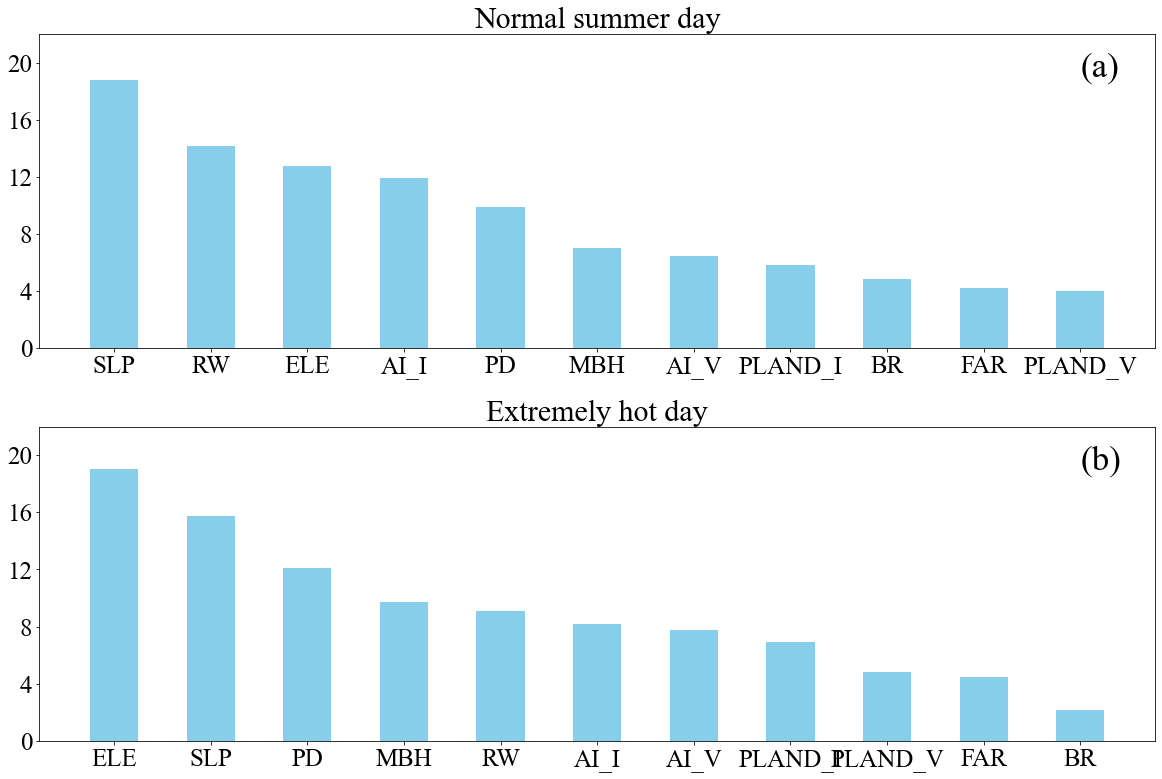

In [250]:
#up2024_0120 14:58

y_tick_set1 = np.arange(0, 22, 4) #to_be_set
fig = plt.figure(figsize=(20,13))
for ii in range(len(order_0)):
    ax = fig.add_subplot(2,1,ii+1)
    ax.bar(range(len(value_0[ii])), value_0[ii], fc='skyblue', width = 0.5)
    ax.set_xticks(np.arange(0, data_len))
    ax.set_xticklabels(var_names2v_0[ii], fontsize = 25, fontname='Times New Roman')
    ax.set_yticks(y_tick_set1)
    ax.set_yticklabels(y_tick_set1, fontsize = 25, fontname='Times New Roman')
    ax.set_title(title_0[ii], fontsize = 30, fontname='Times New Roman')
    ax.set_ylim(0,22) #to_be_set
    ax.text(10, 19, subtitle_0[ii], fontsize=35, color='black', fontname='Times New Roman') #to_be_set
    
plt.subplots_adjust(wspace = 0, hspace =0.25)#调整子图间距
plt.savefig(loc_1 +'FIG_RC1.jpg', format='jpg', dpi=300)

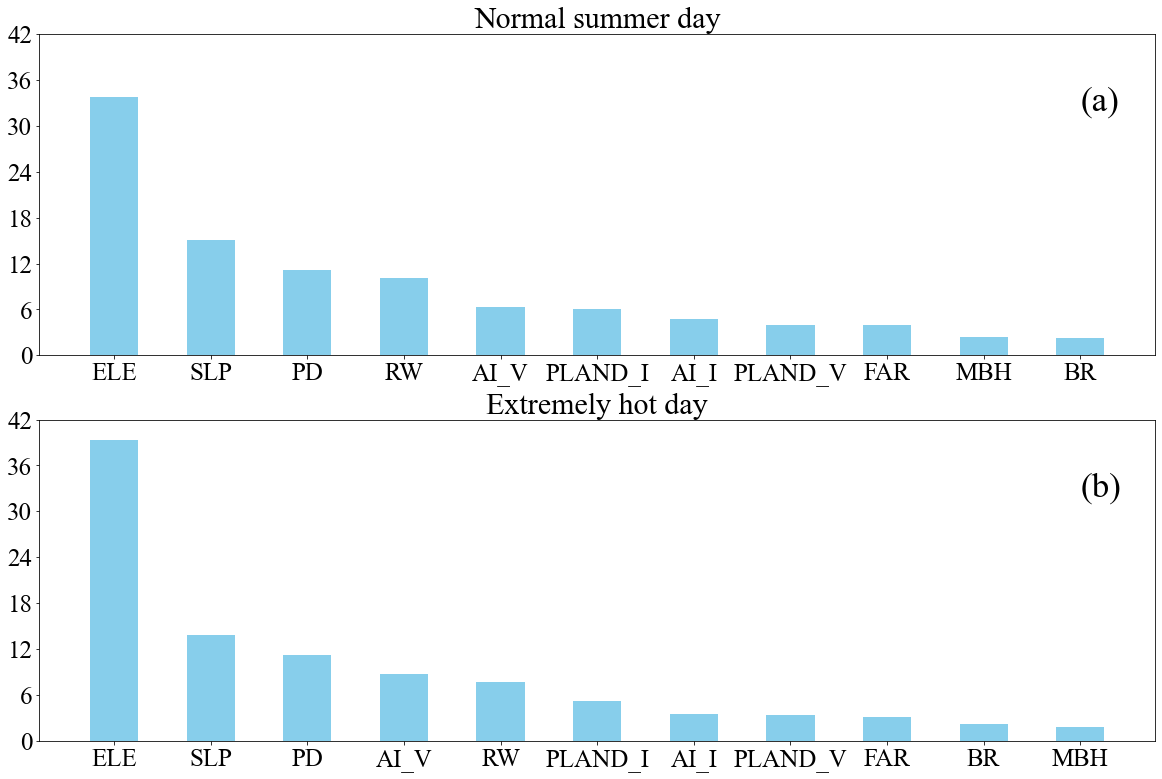

In [251]:
#up2024_0120 14:58

y_tick_set2 = np.arange(0, 45, 6) #to_be_set
fig = plt.figure(figsize=(20,13))
for ii in range(len(order_0)):
    ax = fig.add_subplot(2,1,ii+1)
    ax.bar(range(len(value_1[ii])), value_1[ii], fc='skyblue', width = 0.5)
    ax.set_xticks(np.arange(0, data_len))
    ax.set_xticklabels(var_names2v_1[ii], fontsize = 25, fontname='Times New Roman')
    ax.set_yticks(y_tick_set2)
    ax.set_yticklabels(y_tick_set2, fontsize = 25, fontname='Times New Roman')
    ax.set_title(title_0[ii], fontsize = 30, fontname='Times New Roman')
    ax.set_ylim(0,42) #to_be_set
    ax.text(10, 32, subtitle_0[ii], fontsize=35, color='black', fontname='Times New Roman') #to_be_set
plt.subplots_adjust(wspace = 0, hspace =0.2)#调整子图间距
plt.savefig(loc_1 +'FIG_RC2.jpg', format='jpg', dpi=300)

##### Fig 1.2

In [252]:
#up2024_0201 15:47

vari_list = ["XL_ps_imp", "XL_ps_gre", "XL_ai_imp", "XL_ai_gre", "XL_pd", "XB1b_mean_1", "XB1b_mean_2", \
             "XB1b_ratio", "terrain", "slope", "XA_RIVERW"]    

vari_f2 = dict()

vari_f2[0] = [0,1,2,3,4] #to_be_set
vari_f2[1] = [5,6,7] #to_be_set
vari_f2[2] = [8,9] #to_be_set
vari_f2[3] = [10] #to_be_set

In [253]:
#up2024_0201 15:47

vari_name_0 = dict()
for ii in range(4):
    vari_name_0[ii] = [vari_list[jj] for jj in vari_f2[ii]]
    
print(vari_name_0[0])
print(vari_name_0[1])
print(vari_name_0[2])
print(vari_name_0[3])

['XL_ps_imp', 'XL_ps_gre', 'XL_ai_imp', 'XL_ai_gre', 'XL_pd']
['XB1b_mean_1', 'XB1b_mean_2', 'XB1b_ratio']
['terrain', 'slope']
['XA_RIVERW']


In [254]:
#up2024_0201 15:51

def me_data_rela(f_me_data):
    f_me_max = np.max(f_me_data)
    f_me_min = np.min(f_me_data)
    f_me_mean = np.mean(f_me_data)
    f_me_len = len(f_me_data)
    f_me_data2 = np.zeros(f_me_len)
    for ii in range(f_me_len):
        f_me_data2[ii] = 2 * (f_me_data[ii] - f_me_mean)/(f_me_max - f_me_min)
    return(f_me_data2)

In [255]:
#up2024_0201 15:56

var_set_1 = 0 #to_be_set
vari_name_1 = vari_name_0[var_set_1]
me_size = len(vari_f2[var_set_1]) 
print('me_size', me_size)

me_name = dict()
me_data = dict()

for ii in range(me_size):
    me_name[ii] = dict()
    me_data[ii] = dict()

    me_name[ii][0] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[0] + '_' + vari_name_0[var_set_1][ii]
    me_name[ii][1] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[0] + '_' + vari_name_0[var_set_1][ii]
    me_name[ii][2] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[1] + '_' + vari_name_0[var_set_1][ii]
    me_name[ii][3] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[1] + '_' + vari_name_0[var_set_1][ii]
    
    for jj in range(4):
        me_data[ii][jj] = pd.read_csv(loc_0 + me_name[ii][jj] + '.csv')

print(vari_name_1)
print(me_name[0])
print(me_name[1])
print(me_name[2])
print(me_name[3])
print(me_name[4])

me_size 5
['XL_ps_imp', 'XL_ps_gre', 'XL_ai_imp', 'XL_ai_gre', 'XL_pd']
{0: '2301_brt_partial_5_bufd01s5XY_rci_XL_ps_imp', 1: '2301_brt_partial_4_bufd01s4XY_rci_XL_ps_imp', 2: '2301_brt_partial_5_bufd01s5XY_crci_XL_ps_imp', 3: '2301_brt_partial_4_bufd01s4XY_crci_XL_ps_imp'}
{0: '2301_brt_partial_5_bufd01s5XY_rci_XL_ps_gre', 1: '2301_brt_partial_4_bufd01s4XY_rci_XL_ps_gre', 2: '2301_brt_partial_5_bufd01s5XY_crci_XL_ps_gre', 3: '2301_brt_partial_4_bufd01s4XY_crci_XL_ps_gre'}
{0: '2301_brt_partial_5_bufd01s5XY_rci_XL_ai_imp', 1: '2301_brt_partial_4_bufd01s4XY_rci_XL_ai_imp', 2: '2301_brt_partial_5_bufd01s5XY_crci_XL_ai_imp', 3: '2301_brt_partial_4_bufd01s4XY_crci_XL_ai_imp'}
{0: '2301_brt_partial_5_bufd01s5XY_rci_XL_ai_gre', 1: '2301_brt_partial_4_bufd01s4XY_rci_XL_ai_gre', 2: '2301_brt_partial_5_bufd01s5XY_crci_XL_ai_gre', 3: '2301_brt_partial_4_bufd01s4XY_crci_XL_ai_gre'}
{0: '2301_brt_partial_5_bufd01s5XY_rci_XL_pd', 1: '2301_brt_partial_4_bufd01s4XY_rci_XL_pd', 2: '2301_brt_partial_5_

In [256]:
f2_xt_1 = dict()
f2_xt_1[0] = np.arange(0,125,25)
f2_xt_1[1] = np.arange(0,125,25)
f2_xt_1[2] = np.arange(0,125,25)
f2_xt_1[3] = np.arange(0,125,25)
f2_xt_1[4] = np.arange(0,2.5e12,5e11)

f2_yt_1 = np.arange(-1,2,1)

var_names2_f2_1 = dict()
for ii in range(me_size):
    var_names2_f2_1[ii] = var_names2(vari_name_1[ii])
print(var_names2_f2_1)

f2_xl_1 = ['Normal summer day \n (RCI)', 'Extremely hot day \n (RCI)', 'Normal summer day \n (CRCI)', 'Extremely hot day \n (CRCI)']


{0: 'PLAND_I', 1: 'PLAND_V', 2: 'AI_I', 3: 'AI_V', 4: 'PD'}


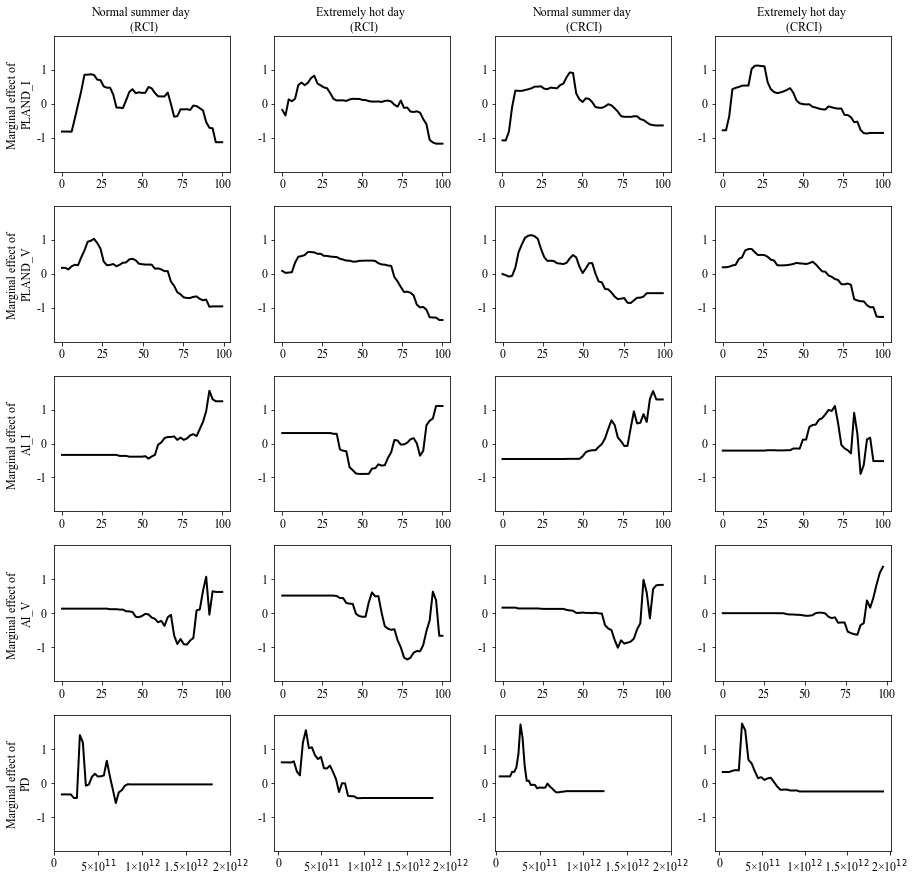

In [257]:
#up2024_0120 16:57

fig = plt.figure(figsize=(15,15))

kk = 0
for ii in range(me_size):
    for jj in range(4):
        c_vari_name = vari_name_1[ii]
        c_f2_x = me_data[ii][jj][c_vari_name].values
        c_f2_y0 = me_data[ii][jj]['yhat'].values
        c_f2_y = me_data_rela(c_f2_y0)
        kk = kk + 1
        ax = fig.add_subplot(me_size, 4, kk)
        ax.plot(c_f2_x,c_f2_y, linewidth=2, color='black')
        ax.set_xticks(f2_xt_1[ii])
        if ii == 4:
            ax.set_xticklabels([0, '5×10$^{11}$', '1×10$^{12}$', '1.5×10$^{12}$', '2×10$^{12}$'], fontsize = 12, fontname='Times New Roman')
        else:
            ax.set_xticklabels(f2_xt_1[ii], fontsize = 12, fontname='Times New Roman')
        ax.set_yticks(f2_yt_1)
        ax.set_yticklabels(f2_yt_1, fontsize = 12, fontname='Times New Roman')
        ax.set_ylim(-2,2)
        if jj == 0:
            ax.set_ylabel('Marginal effect of \n' + var_names2_f2_1[ii], fontsize = 12, fontname='Times New Roman')
        if ii == 0:
            ax.set_title(f2_xl_1[jj], fontsize = 12, fontname='Times New Roman')
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)  #调整子图间距
plt.savefig(loc_1 +'FIG_MEB1.jpg', format='jpg', dpi=300)

In [258]:
#up2024_0201 15:56

var_set_2 = 1 #to_be_set
vari_name_2 = vari_name_0[var_set_2]
me_size2 = len(vari_f2[var_set_2]) 
print('me_size2', me_size2)

me_name2 = dict()
me_data2 = dict()

for ii in range(me_size2):
    me_name2[ii] = dict()
    me_data2[ii] = dict()

    me_name2[ii][0] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[0] + '_' + vari_name_0[var_set_2][ii]
    me_name2[ii][1] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[0] + '_' + vari_name_0[var_set_2][ii]
    me_name2[ii][2] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[1] + '_' + vari_name_0[var_set_2][ii]
    me_name2[ii][3] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[1] + '_' + vari_name_0[var_set_2][ii]
    
    for jj in range(4):
        me_data2[ii][jj] = pd.read_csv(loc_0 + me_name2[ii][jj] + '.csv')

print(vari_name_2)
print(me_name2[0])
print(me_name2[1])
print(me_name2[2])

print(vari_name_2)

me_size2 3
['XB1b_mean_1', 'XB1b_mean_2', 'XB1b_ratio']
{0: '2301_brt_partial_5_bufd01s5XY_rci_XB1b_mean_1', 1: '2301_brt_partial_4_bufd01s4XY_rci_XB1b_mean_1', 2: '2301_brt_partial_5_bufd01s5XY_crci_XB1b_mean_1', 3: '2301_brt_partial_4_bufd01s4XY_crci_XB1b_mean_1'}
{0: '2301_brt_partial_5_bufd01s5XY_rci_XB1b_mean_2', 1: '2301_brt_partial_4_bufd01s4XY_rci_XB1b_mean_2', 2: '2301_brt_partial_5_bufd01s5XY_crci_XB1b_mean_2', 3: '2301_brt_partial_4_bufd01s4XY_crci_XB1b_mean_2'}
{0: '2301_brt_partial_5_bufd01s5XY_rci_XB1b_ratio', 1: '2301_brt_partial_4_bufd01s4XY_rci_XB1b_ratio', 2: '2301_brt_partial_5_bufd01s5XY_crci_XB1b_ratio', 3: '2301_brt_partial_4_bufd01s4XY_crci_XB1b_ratio'}
['XB1b_mean_1', 'XB1b_mean_2', 'XB1b_ratio']


In [259]:
f2_xt_2 = dict()
f2_xt_2[0] = np.arange(0,25,10)
f2_xt_2[1] = np.arange(0,180,50)
f2_xt_2[2] = np.arange(0,0.5,0.2)


var_names2_f2_2 = dict()
for ii in range(me_size2):
    var_names2_f2_2[ii] = var_names2(vari_name_2[ii])
print(var_names2_f2_2)

{0: 'FAR', 1: 'MBH', 2: 'BR'}


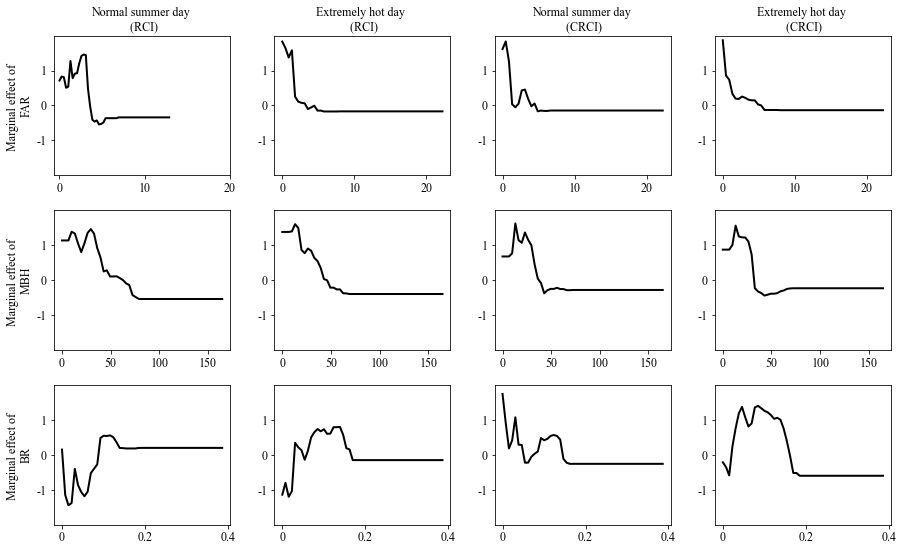

In [260]:
#up2024_0120 16:57

fig = plt.figure(figsize=(15,9))

kk = 0
for ii in range(me_size2):
    for jj in range(4):
        c_vari_name = vari_name_2[ii]
        c_f2_x = me_data2[ii][jj][c_vari_name].values
        c_f2_y0 = me_data2[ii][jj]['yhat'].values
        c_f2_y = me_data_rela(c_f2_y0)
        kk = kk + 1
        ax = fig.add_subplot(me_size2, 4, kk)
        ax.plot(c_f2_x,c_f2_y, linewidth=2, color='black')
        ax.set_xticks(f2_xt_2[ii])
        if ii == 2:
            ax.set_xticklabels([0,0.2,0.4], fontsize = 12, fontname='Times New Roman')
        else:
            ax.set_xticklabels(f2_xt_2[ii], fontsize = 12, fontname='Times New Roman')
        ax.set_ylim(-2,2)
        ax.set_yticks(f2_yt_1)
        ax.set_yticklabels(f2_yt_1, fontsize = 12, fontname='Times New Roman')

        if jj == 0:
            ax.set_ylabel('Marginal effect of \n' + var_names2_f2_2[ii], fontsize = 12, fontname='Times New Roman')
        if ii == 0:
            ax.set_title(f2_xl_1[jj], fontsize = 12, fontname='Times New Roman')
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)  #调整子图间距
plt.savefig(loc_1 +'FIG_MEB2.jpg', format='jpg', dpi=300)

In [261]:
#up2024_0201 15:56

var_set_3 = 2 #to_be_set
vari_name_3 = vari_name_0[var_set_3]
me_size3 = len(vari_f2[var_set_3]) 
print('me_size3', me_size3)

me_name3 = dict()
me_data3 = dict()

for ii in range(me_size3):
    me_name3[ii] = dict()
    me_data3[ii] = dict()

    me_name3[ii][0] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[0] + '_' + vari_name_0[var_set_3][ii]
    me_name3[ii][1] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[0] + '_' + vari_name_0[var_set_3][ii]
    me_name3[ii][2] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[1] + '_' + vari_name_0[var_set_3][ii]
    me_name3[ii][3] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[1] + '_' + vari_name_0[var_set_3][ii]
    
    for jj in range(4):
        me_data3[ii][jj] = pd.read_csv(loc_0 + me_name3[ii][jj] + '.csv')

print(vari_name_3)
print(me_name3[0])
print(me_name3[1])


me_size3 2
['terrain', 'slope']
{0: '2301_brt_partial_5_bufd01s5XY_rci_terrain', 1: '2301_brt_partial_4_bufd01s4XY_rci_terrain', 2: '2301_brt_partial_5_bufd01s5XY_crci_terrain', 3: '2301_brt_partial_4_bufd01s4XY_crci_terrain'}
{0: '2301_brt_partial_5_bufd01s5XY_rci_slope', 1: '2301_brt_partial_4_bufd01s4XY_rci_slope', 2: '2301_brt_partial_5_bufd01s5XY_crci_slope', 3: '2301_brt_partial_4_bufd01s4XY_crci_slope'}


In [262]:
f2_xt_3 = dict()
f2_xt_3[0] = np.arange(150,300,50)
f2_xt_3[1] = np.arange(0,50,20)

var_names2_f2_3 = dict()
for ii in range(me_size3):
    var_names2_f2_3[ii] = var_names2(vari_name_3[ii])
print(var_names2_f2_3)

{0: 'ELE', 1: 'SLP'}


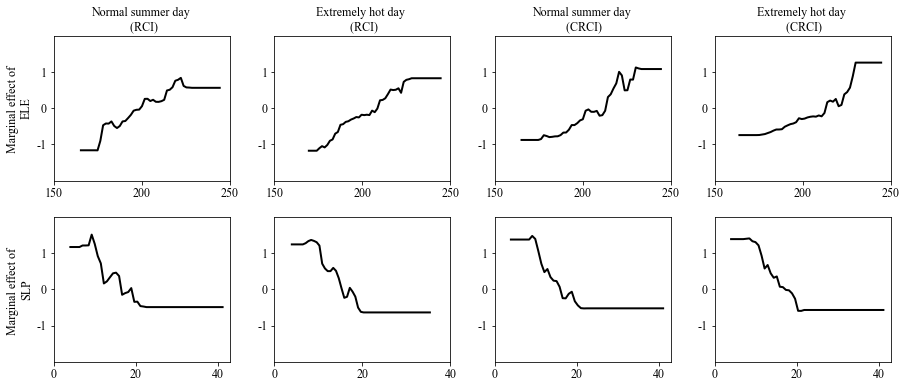

In [263]:
#up2024_0120 16:57

fig = plt.figure(figsize=(15,6))

kk = 0
for ii in range(me_size3):
    for jj in range(4):
        c_vari_name = vari_name_3[ii]
        c_f2_x = me_data3[ii][jj][c_vari_name].values
        c_f2_y0 = me_data3[ii][jj]['yhat'].values
        c_f2_y = me_data_rela(c_f2_y0)
        kk = kk + 1
        ax = fig.add_subplot(me_size3, 4, kk)
        ax.plot(c_f2_x,c_f2_y, linewidth=2, color='black')
        ax.set_ylim(-2,2)
        ax.set_xticks(f2_xt_3[ii])
        ax.set_xticklabels(f2_xt_3[ii], fontsize = 12, fontname='Times New Roman')
        ax.set_yticks(f2_yt_1)
        ax.set_yticklabels(f2_yt_1, fontsize = 12, fontname='Times New Roman')

        if jj == 0:
            ax.set_ylabel('Marginal effect of \n' + var_names2_f2_3[ii], fontsize = 12, fontname='Times New Roman')
        if ii == 0:
            ax.set_title(f2_xl_1[jj], fontsize = 12, fontname='Times New Roman')
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)  #调整子图间距
plt.savefig(loc_1 +'FIG_MEB3.jpg', format='jpg', dpi=300)

In [264]:
#up2024_0201 15:56

var_set_4 = 3 #to_be_set
vari_name_4 = vari_name_0[var_set_4]
me_size4 = len(vari_f2[var_set_4]) 
print('me_size4', me_size4)

me_name4 = dict()
me_data4 = dict()

for ii in range(me_size4):
    me_name4[ii] = dict()
    me_data4[ii] = dict()

    me_name4[ii][0] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[0] + '_' + vari_name_0[var_set_4][ii]
    me_name4[ii][1] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[0] + '_' + vari_name_0[var_set_4][ii]
    me_name4[ii][2] = '2301_brt_partial_' + order_0[0] + '_buf' + buffer_0[0] + vari_y_0[1] + '_' + vari_name_0[var_set_4][ii]
    me_name4[ii][3] = '2301_brt_partial_' + order_0[1] + '_buf' + buffer_0[1] + vari_y_0[1] + '_' + vari_name_0[var_set_4][ii]
    
    for jj in range(4):
        me_data4[ii][jj] = pd.read_csv(loc_0 + me_name4[ii][jj] + '.csv')

print(vari_name_4)
print(me_name4[0])



me_size4 1
['XA_RIVERW']
{0: '2301_brt_partial_5_bufd01s5XY_rci_XA_RIVERW', 1: '2301_brt_partial_4_bufd01s4XY_rci_XA_RIVERW', 2: '2301_brt_partial_5_bufd01s5XY_crci_XA_RIVERW', 3: '2301_brt_partial_4_bufd01s4XY_crci_XA_RIVERW'}


In [265]:
f2_xt_4 = dict()
f2_xt_4[0] = np.arange(0,1200,500)


var_names2_f2_4 = dict()
for ii in range(me_size4):
    var_names2_f2_4[ii] = var_names2(vari_name_4[ii])
print(var_names2_f2_4)

{0: 'RW'}


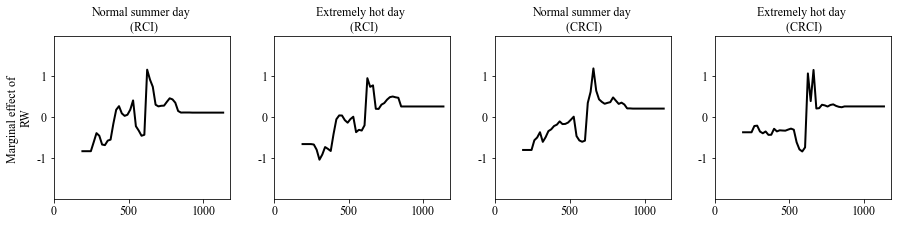

In [266]:
#up2024_0120 16:57

fig = plt.figure(figsize=(15,3))

kk = 0
for ii in range(me_size4):
    for jj in range(4):
        c_vari_name = vari_name_4[ii]
        c_f2_x = me_data4[ii][jj][c_vari_name].values
        c_f2_y0 = me_data4[ii][jj]['yhat'].values
        c_f2_y = me_data_rela(c_f2_y0)
        kk = kk + 1
        ax = fig.add_subplot(me_size4, 4, kk)
        ax.plot(c_f2_x,c_f2_y, linewidth=2, color='black')
        ax.set_ylim(-2,2)
        ax.set_xticks(f2_xt_4[ii])
        ax.set_xticklabels(f2_xt_4[ii], fontsize = 12, fontname='Times New Roman')
        ax.set_yticks(f2_yt_1)
        ax.set_yticklabels(f2_yt_1, fontsize = 12, fontname='Times New Roman')

        if jj == 0:
            ax.set_ylabel('Marginal effect of \n' + var_names2_f2_4[ii], fontsize = 12, fontname='Times New Roman')
        if ii == 0:
            ax.set_title(f2_xl_1[jj], fontsize = 12, fontname='Times New Roman')
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)  #调整子图间距
plt.savefig(loc_1 +'FIG_MEB4.jpg', format='jpg', dpi=300)